In [1]:
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
DATA_DIR = ""
# Train_DIR = os.path.join(DATA_DIR, "train_folder")
Test_DIR = os.path.join(DATA_DIR, "test_folder")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


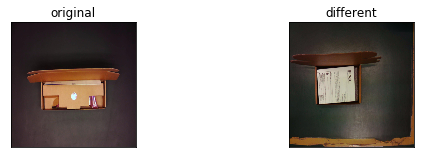

In [3]:
def show_img(sid, img_file, img_title):
    plt.subplot(sid)
    plt.title(img_title)
    plt.xticks([])
    plt.yticks([])
    img = imresize(plt.imread(img_file), (512, 512))
    plt.imshow(img)
    
show_img(131, os.path.join(Test_DIR, "330009.jpg"), "original")
# show_img(132, os.path.join(Test_DIR, "100401.jpg"), "similar")
show_img(133, os.path.join(Test_DIR, "180007.jpg"), "different")
plt.tight_layout()
plt.show()

In [4]:
check = pd.DataFrame(pd.read_csv('check.csv'))
check.head()

,ytest,ytest_,l_file,r_file
0,0,0,460003.jpg,290003.jpg
1,1,1,460007.jpg,460008.jpg
2,1,1,270007.jpg,270008.jpg
3,0,0,080008.jpg,260007.jpg
4,1,0,140001.jpg,140003.jpg


In [5]:
check['tf'] = check['ytest'] - check['ytest_']
check.head()

,ytest,ytest_,l_file,r_file,tf
0,0,0,460003.jpg,290003.jpg,0
1,1,1,460007.jpg,460008.jpg,0
2,1,1,270007.jpg,270008.jpg,0
3,0,0,080008.jpg,260007.jpg,0
4,1,0,140001.jpg,140003.jpg,1


In [14]:
check[check['tf'] != 0]

,ytest,ytest_,l_file,r_file,tf
4,1,0,140001.jpg,140003.jpg,1
18,1,0,420003.jpg,420002.jpg,1
21,1,0,280008.jpg,280009.jpg,1
22,1,0,450001.jpg,450003.jpg,1
24,1,0,280003.jpg,280001.jpg,1
32,1,0,280008.jpg,280009.jpg,1
37,1,0,140001.jpg,140003.jpg,1
38,1,0,420003.jpg,420002.jpg,1
42,0,1,330009.jpg,180007.jpg,-1
60,1,0,450001.jpg,450003.jpg,1


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


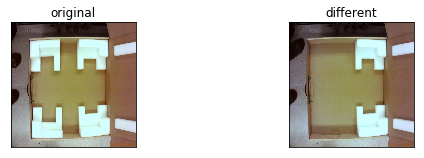

In [15]:
show_img(131, os.path.join(Test_DIR, "140001.jpg"), "original")
# show_img(132, os.path.join(Test_DIR, "100401.jpg"), "similar")
show_img(133, os.path.join(Test_DIR, "140003.jpg"), "different")
plt.tight_layout()
plt.show()

In [16]:
result1 = pd.DataFrame(pd.read_csv('result.csv'))
result1.head()

,l_filename,r_filename,Label,Pred_Label,net_pro,pos_pro
0,090008.jpg,120009.jpg,0,1,0.001100,0.998900
1,160006.jpg,290006.jpg,0,1,0.000524,0.999476
2,250009.jpg,280007.jpg,0,0,0.955193,0.044807
3,070006.jpg,090009.jpg,0,0,0.999294,0.000706
4,220009.jpg,450006.jpg,0,0,0.998139,0.001861


In [17]:
result1['l_filename'][0:3]

0    090008.jpg
1    160006.jpg
2    250009.jpg
Name: l_filename, dtype: object

### Histograms

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import argparse
import numpy as np
import cv2

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


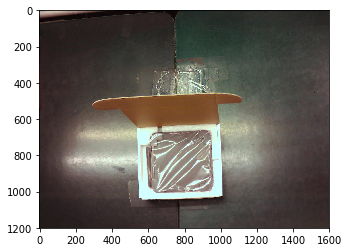

In [2]:
image_1 = plt.imread('/home/ubuntu/siamese/test_folder/010006.jpg')
plt.imshow(image_1)

In [ ]:
h = np.zeros((256,256,3)) #创建用于绘制直方图的全0图像    
         
bins = np.arange(256).reshape(256,1) #直方图中各bin的顶点位置    
color = [ (255,0,0),(0,255,0),(0,0,255) ] #BGR三种颜色    
for ch, col in enumerate(color):    
    originHist = cv2.calcHist([image_1],[ch],None,[256],[0,256])    
    cv2.normalize(originHist, originHist,0,255*0.9,cv2.NORM_MINMAX)    
    hist=np.int32(np.around(originHist))    
    pts = np.column_stack((bins,hist))    
    cv2.polylines(h,[pts],False,col)    
         
h=np.flipud(h)    
         
cv2.imshow('colorhist',h)    
cv2.waitKey(0)  